# Задача 5. Обучение без учителя

* **Дедлайн**: 14.04.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [x] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [x] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [x] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [x] При обучении использовать **подбор гиперпараметров**.
- [x] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [x] (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [x] (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.


## Датасет

Будем использовать датасет [mice-protein-expression](https://www.kaggle.com/datasets/ruslankl/mice-protein-expression) для разделения белков на кластеры, которые определяют классы мышей.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mice.csv")
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

## Разведочный анализ (EDA)

In [3]:
df["class"].value_counts().sort_index()

c-CS-m    150
c-CS-s    135
c-SC-m    150
c-SC-s    135
t-CS-m    135
t-CS-s    105
t-SC-m    135
t-SC-s    135
Name: class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

Заметим, что размеры количество мышей каждого класса примерно одинаковое количество, соответственно, кластеры должны получиться примерно равномерными.

Также присутствуют столбцы с большим количеством пропущенных значений. Чем и на основе чего их заполнять не очень понятно, вписав среднее арифметическое можно внести слишком большую погрешность. 
С другой стороны выкидывать слишком много столбцов не хочется, т.к. они могут быть существенными. Поэтому в столбцы с небольшим количеством пропущенных значений на пустые места было принято решение написать среднее арифметическое по соответствующим столбцам.

Дополнительно стоит отметить, что столбцы `Genotype`, `Treatment`, `Behavior` однозначно задают значение столбца `class` (существует явная и простая формула дающая 100% результат предсказания), поэтому было принято решение выкинуть их из датасета.

В результате в датасете остаётся 73 столбца (включая целевой).

In [5]:
df = df.drop(columns=["BAD_N", "BCL2_N", "H3AcK18_N", "EGR1_N", "H3MeK4_N", "MouseID"])

In [6]:
for col in ["Genotype", "Treatment", "Behavior", "class"]:
    print(f'{col} --- {df[col].unique()}')

Genotype --- ['Control' 'Ts65Dn']
Treatment --- ['Memantine' 'Saline']
Behavior --- ['C/S' 'S/C']
class --- ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [7]:
genotype_code = {
    "Control": 0,
    "Ts65Dn": 1,
}
treatment_code = {
    "Memantine": 0,
    "Saline": 1,
}
behavior_code = {
    "C/S": 0,
    "S/C": 1,
}
class_code = {
    "c-CS-m": 0,
    "c-SC-m": 1,
    "c-CS-s": 2,
    "c-SC-s": 3,
    "t-CS-m": 4,
    "t-SC-m": 5,
    "t-CS-s": 6,
    "t-SC-s": 7,
}
code = {}
code.update(genotype_code)
code.update(treatment_code)
code.update(behavior_code)
code.update(class_code)

for col in ["Genotype", "Treatment", "Behavior", "class"]:
    df.loc[:,col]=df[col].map(code)

for index, row in df.iterrows():
    c = row["Genotype"]
    t = row["Treatment"]
    b = row["Behavior"]
    y = row["class"]

    if c * 4 + t * 2 + b != y:
        print("NO")  # Ни разу не выведет --> три столбца однозначно задают целевой

df = df.drop(columns=["Genotype", "Treatment", "Behavior"])

<ipython-input-7-23c4413e64cb>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col]=df[col].map(code)
<ipython-input-7-23c4413e64cb>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col]=df[col].map(code)
<ipython-input-7-23c4413e64cb>:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col

In [8]:
df = df.fillna(df.mean())

x = df.drop(columns=["class"])  # Данные для решения задачи кластеризации
y = df["class"]  # Целевой признак, по которому будем оценивать качество кластеризации

# Множество точек принадлежащих каждому кластеру
c_CS_m = df[y == 0]
c_SC_m = df[y == 1]
c_CS_s = df[y == 2]
c_SC_s = df[y == 3]
t_CS_m = df[y == 4]
t_SC_m = df[y == 5]
t_CS_s = df[y == 6]
t_SC_s = df[y == 7]

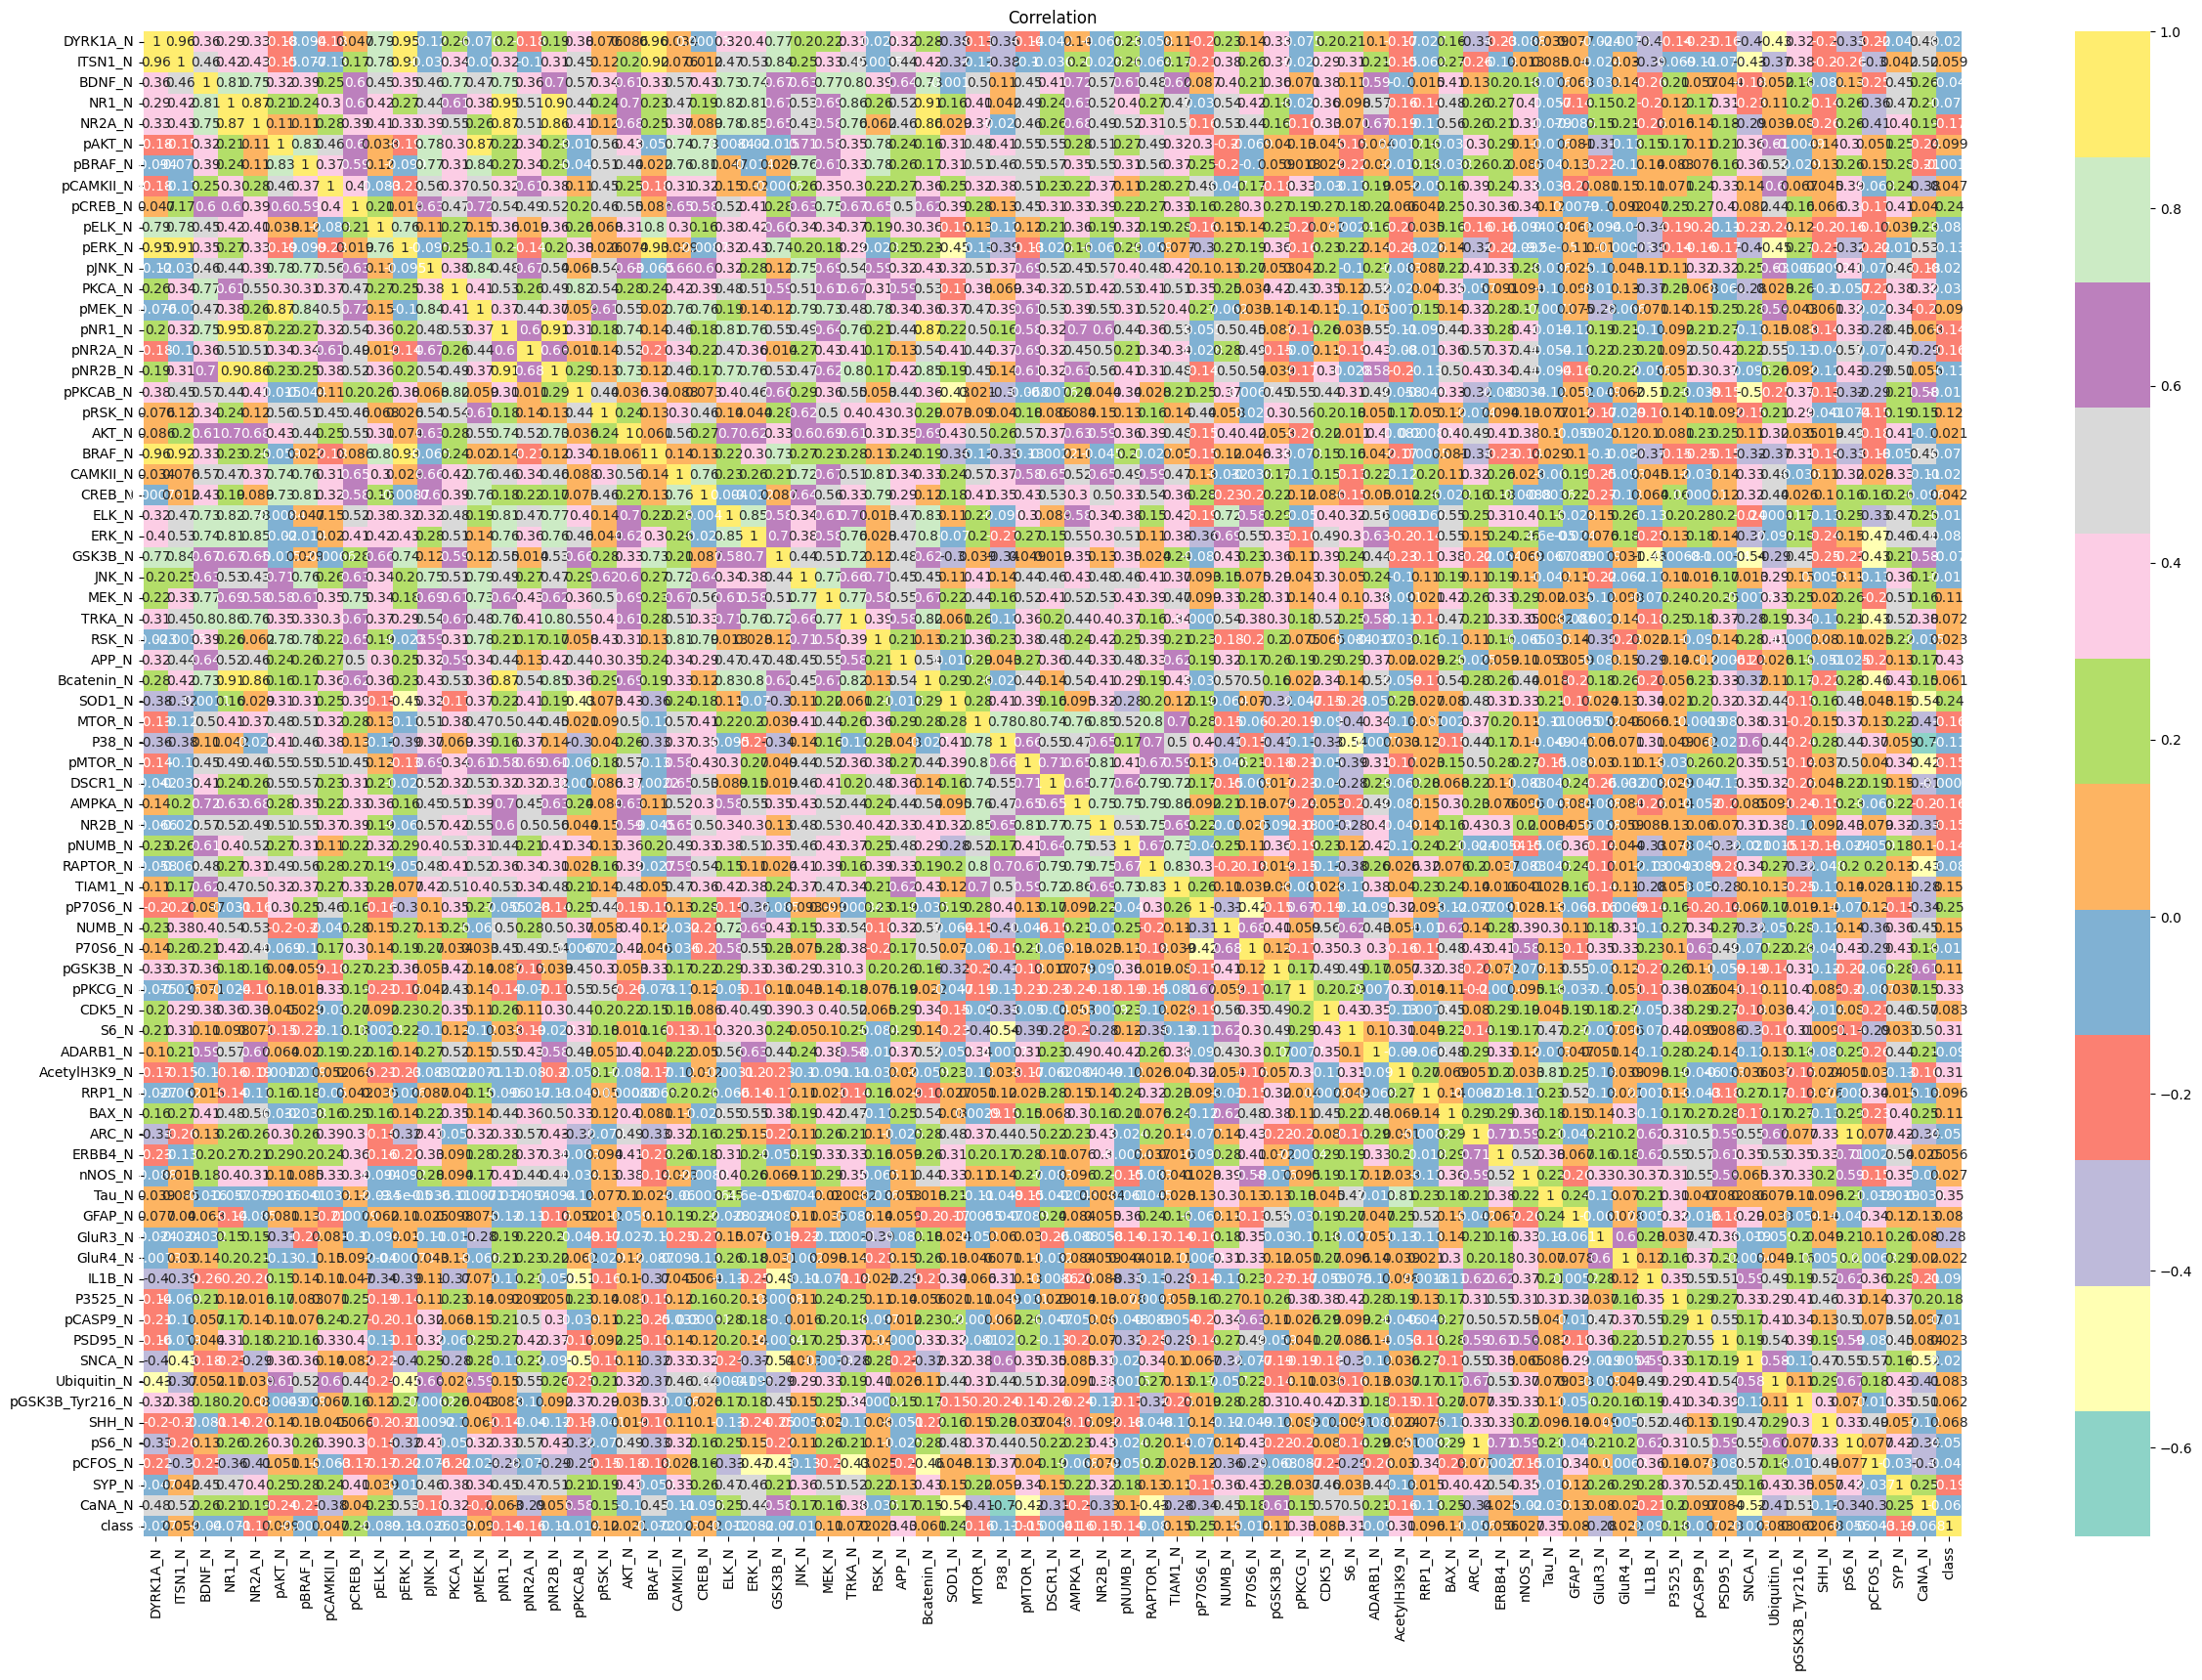

In [9]:
corr = df.corr()

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap="Set3")
plt.title('Correlation')
plt.show()

Как видно из карты корреляций, есть много сильно коррелирующих признаков, следовательно, можно уменьшить размерность.

In [10]:
from sklearn.decomposition import PCA

In [53]:
def projection_2d(x, algo_name, y):
    plt.figure(figsize=(13, 10))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.colormaps["nipy_spectral"].resampled(8), edgecolors="none",
                alpha=0.4)
    plt.colorbar()
    plt.title(f"2D projection from {algo_name}")
    plt.grid(None)

def projection_3d(x, algo_name, y):
    plt.figure(figsize=(13, 10))
    fig = plt.figure(figsize=(13, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.colormaps["nipy_spectral"].resampled(8), edgecolors="none",
                alpha=0.4)
    plt.title(f"3D projection from {algo_name}")
    plt.grid(None)

In [12]:
%%time

pca = PCA()
pca_x = pca.fit_transform(x)

pca_2d = PCA(n_components=2)
pca_x_2d = pca_2d.fit_transform(x)

pca_3d = PCA(n_components=3)
pca_x_3d = pca_3d.fit_transform(x)

CPU times: user 48.6 ms, sys: 62 ms, total: 111 ms
Wall time: 123 ms


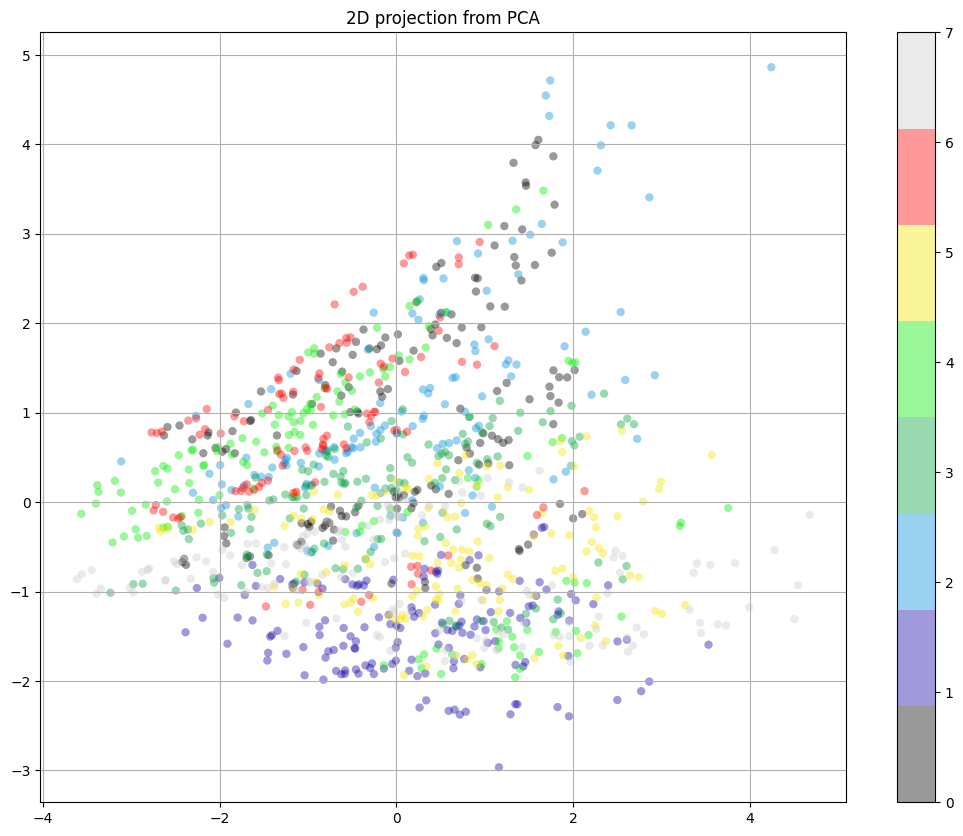

In [54]:
projection_2d(pca_x_2d, "PCA", y)

<Figure size 1300x1000 with 0 Axes>

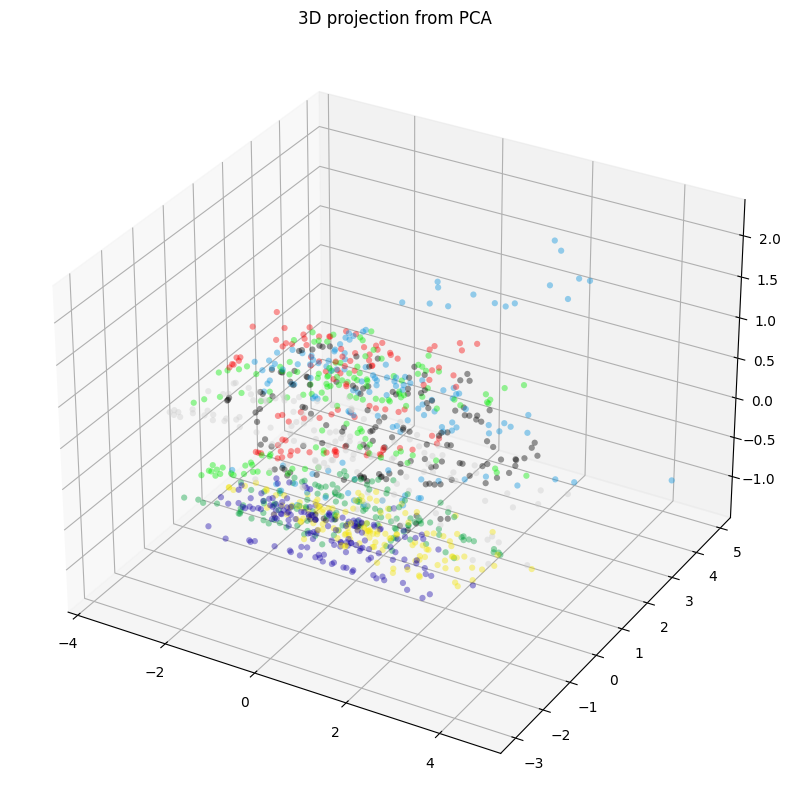

In [56]:
projection_3d(pca_x_3d, "PCA", y)

In [15]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
tsne_x = tsne.fit_transform(df)

tsne_2d = TSNE(random_state=0, n_components=2)
tsne_x_2d = tsne_2d.fit_transform(df)

tsne_3d = TSNE(random_state=0, n_components=3)
tsne_x_3d = tsne_3d.fit_transform(df)

CPU times: user 53 s, sys: 655 ms, total: 53.7 s
Wall time: 30 s


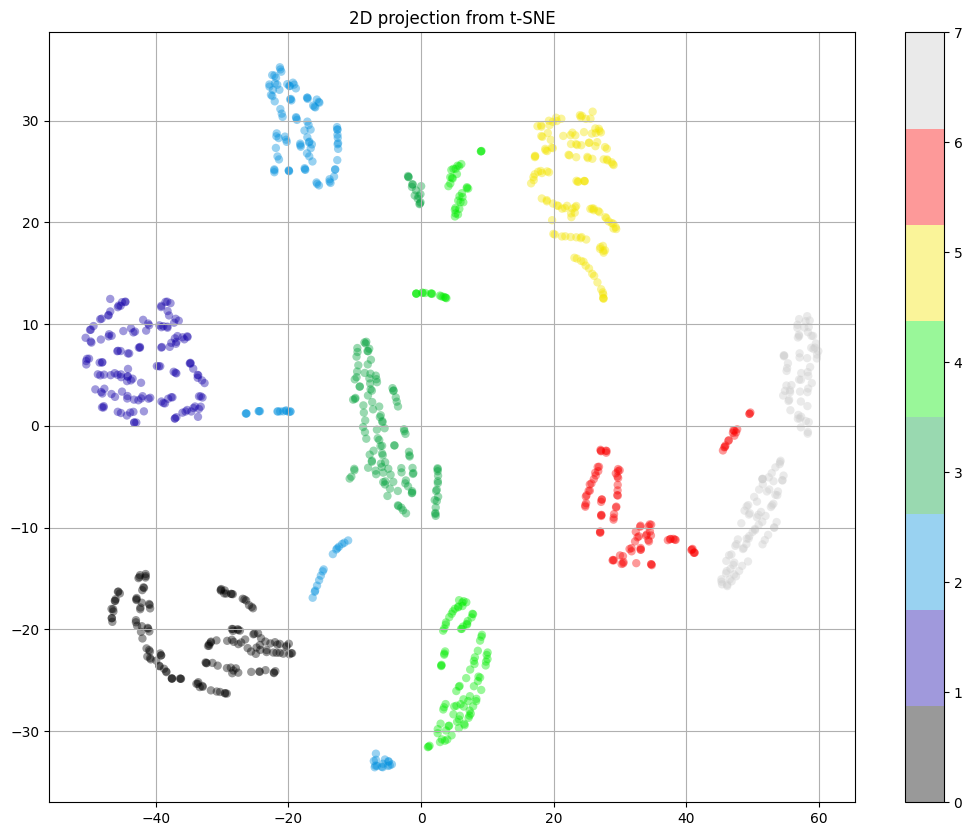

In [55]:
projection_2d(tsne_x_2d, "t-SNE", y)

<Figure size 1300x1000 with 0 Axes>

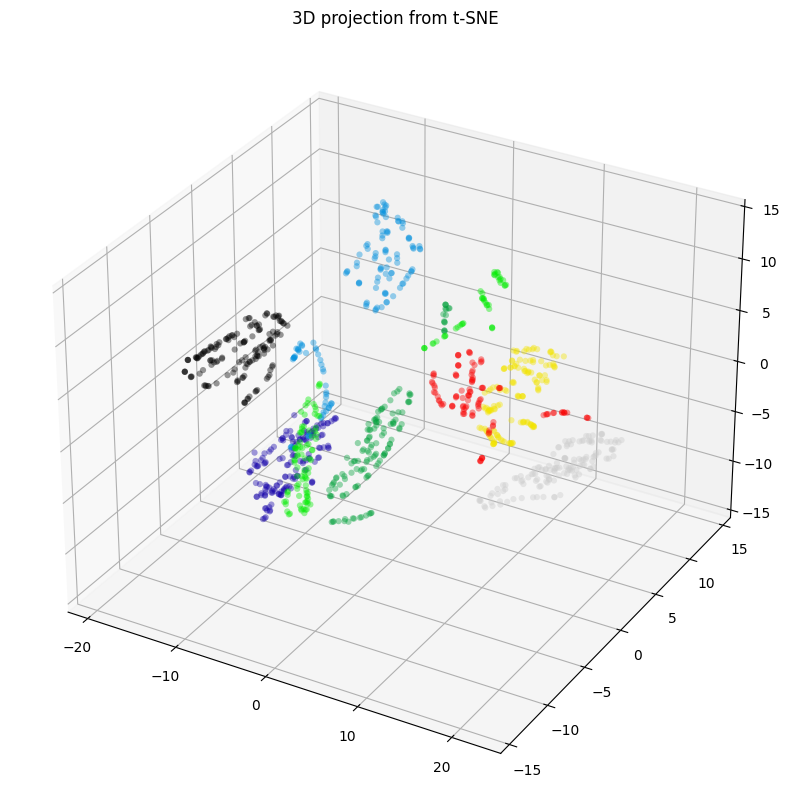

In [57]:
projection_3d(tsne_x_3d, "t-SNE", y)

В случае с PCA можно заметить какую-то структуру, но видно, что группы сильно перемешаны и явно выделить кластеры сложно.

С двумерной t-SNE проекцией ситуация существенно лучше: кластеры образуют явные группы, но при это некоторые из них сильно делятся на несколько групп, поэтому вряд ли алгортимы правильно соотнесут их.
На трёхмерной t-SNE проекции кластеры тоже явно видно, но также видно, что они сильно перемешаны между собой. 

Стоит также отметить, что t-SNE работает ощутимо дольше PCA.

Далее попробуем снизить число признаков при помощи PCA.

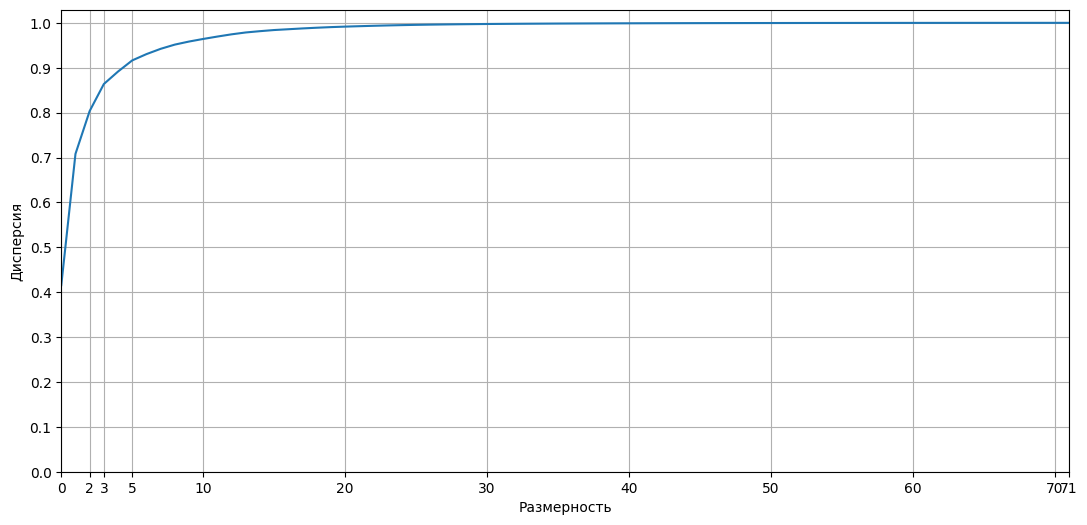

In [18]:
plt.figure(figsize=(13, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Размерность")
plt.ylabel("Дисперсия")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(list(plt.xticks()[0]) + [2, 3, 5, 71])
plt.xlim(0, 71)
plt.grid(True)

Видно, что 2 признака позволяет описать 80% дисперсии, 3 около 85%, 5 около 90%, а начиная с 30 добавление новых признаков практически не приносит новой информации.

## Реализация KMeans

In [19]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.estimator_checks import check_estimator


class MyKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=8, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def fit(self, X, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        X = check_array(X)

        self.n_features_in_ = X.shape[1]

        self.cluster_centers_ = X[self.random_state_.choice(len(X), size=self.n_clusters, replace=False), :]

        max_center_shift = np.inf
        while max_center_shift > self.tol:
            self.labels_ = self._get_labels(X)

            new_centers = np.empty((self.n_clusters, self.n_features_in_))
            for label in np.unique(self.labels_):
                new_centers[label] = np.mean(X[self.labels_ == label], axis=0)

            max_center_shift = np.max(np.linalg.norm(self.cluster_centers_ - new_centers, axis=1))

            self.cluster_centers_ = new_centers

        return self

    def predict(self, X):
        check_is_fitted(self)
        return self._get_labels(check_array(X))
    
    def _get_labels(self, X):
        return np.argmin(
            np.linalg.norm(X[..., None] - self.cluster_centers_.T, axis=1),
            axis=1,
        )


check_estimator(MyKMeans())

## Обучение

Выберем датасеты, сжатые до определённых выше размерностей.

In [20]:
reduced_x = []
for dims in [2, 3, 5, 30]:
    pca = PCA(n_components=dims)
    curr_reduce_x = pca.fit_transform(x)
    reduced_x.append(curr_reduce_x)
reduced_x.append(x.to_numpy(dtype=np.float64))

Так как наш датасет размечен, т.е. мы знаем истиные кластера, то можно использовать метрики основанные на сравнении истинных и предсказанных значений:
- Adjusted Rand Index (ARI)
- Adjusted Mutual Information (AMI)
- Fowlkes-Mallows Index (FMI)
- Homogeneity score (HOMO)

Подбор гипер-параметров осуществлеятся полным перебором, для каждой метрики ищется свой лучший набор параметров.

In [63]:
import pathlib
from itertools import product
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, homogeneity_score

RESULTS_PATH = pathlib.Path("train_results.csv")


def make_grid(params):
    completed_params = [[(key, v) for v in params[key]] for key in params]
    grid = [dict(param) for param in product(*completed_params)]
    return grid


def train_export(estimator, params):
    grid = make_grid(params)

    results = []
    for rx in reduced_x:
        best_ari = None
        best_ami = None
        best_fmi = None
        best_homo = None
        best_all = None

        for params in grid:
            e = clone(estimator).set_params(**params)

            start_t = time.perf_counter()
            pred = e.fit_predict(rx)
            end_t = time.perf_counter()
            fit_predict_time = (end_t - start_t)

            ari = adjusted_rand_score(y, pred)
            ami = adjusted_mutual_info_score(y, pred)
            fmi = fowlkes_mallows_score(y, pred)
            homo = homogeneity_score(y, pred)
            if ((best_ari is None and 
                best_ami is None and 
                best_fmi is None and 
                best_homo is None) or 
                (ari > best_all[0][0] and 
                 ami > best_all[0][1] and 
                 fmi > best_all[0][2] and 
                 homo > best_all[0][3])
                ):
                best_all = (ari, ami, fmi, homo), fit_predict_time, params

            if best_homo is None or homo > best_homo[0]:
                best_homo = homo, fit_predict_time, params

            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, fit_predict_time, params

            ami = adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, fit_predict_time, params

            fmi = fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, fit_predict_time, params

        print(
            f"Best params for {rx.shape[1]}:",
            f"By ARI: {best_ari[2]} --- {best_ari[0]}",
            f"By AMI: {best_ami[2]} --- {best_ami[0]}",
            f"By FMI: {best_fmi[2]} --- {best_fmi[0]}",
            f"By homogeneity: {best_homo[2]} --- {best_homo[0]}",
            f"By all metrics: {best_all[2]} --- {best_all[0]}", 
            "",
            sep="\n",
        )

        results.append(
            {
                "Clusterer": estimator.__class__.__name__,
                "Dimension size": rx.shape[1],
                "Mean fit_predict time": np.mean([best_ari[1], best_ami[1], best_fmi[1], best_homo[1], best_all[1]]),
                "ARI": best_ari[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0],
                "HOMO": best_homo[0],
                "All": best_all[0]
            }
        )

    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())

In [64]:
%%time
n_clusters = 8

train_export(MyKMeans(n_clusters=n_clusters, random_state=0), {})

Best params for 2:
By ARI: {} --- 0.09279706492130022
By AMI: {} --- 0.18135331991842898
By FMI: {} --- 0.21263431184642245
By homogeneity: {} --- 0.18784227352223476
By all metrics: {} --- (0.09279706492130022, 0.18135331991842898, 0.21263431184642245, 0.18784227352223476)

Best params for 3:
By ARI: {} --- 0.11792258391996153
By AMI: {} --- 0.21683089059872293
By FMI: {} --- 0.2302054651655691
By homogeneity: {} --- 0.2246367804005542
By all metrics: {} --- (0.11792258391996153, 0.21683089059872293, 0.2302054651655691, 0.2246367804005542)

Best params for 5:
By ARI: {} --- 0.1457426707160239
By AMI: {} --- 0.2476892346851205
By FMI: {} --- 0.2551198112405597
By homogeneity: {} --- 0.2546248815255646
By all metrics: {} --- (0.1457426707160239, 0.2476892346851205, 0.2551198112405597, 0.2546248815255646)

Best params for 30:
By ARI: {} --- 0.15602020532946434
By AMI: {} --- 0.2618566630936362
By FMI: {} --- 0.2650852611764715
By homogeneity: {} --- 0.26797552108780515
By all metrics: {}

In [65]:
%%time
from sklearn.cluster import KMeans

train_export(
    KMeans(n_clusters=n_clusters, n_init="auto", random_state=0),
    {
        "algorithm": ["lloyd", "elkan"],
        "tol": [5e-5, 1e-4, 5e-5, 1e-3],
        "max_iter": [200, 300, 400]
    },
)

Best params for 2:
By ARI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.09842455768042965
By AMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.18702885518312198
By FMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.21617333863074142
By homogeneity: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.1938801272620135
By all metrics: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- (0.09842455768042965, 0.18702885518312198, 0.21617333863074142, 0.1938801272620135)

Best params for 3:
By ARI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.1371292717367381
By AMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.24800494730944428
By FMI: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.24643501556263234
By homogeneity: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- 0.255709503266047
By all metrics: {'algorithm': 'lloyd', 'tol': 5e-05, 'max_iter': 200} --- (0.1371292717367381, 0.248004

In [66]:
%%time
from sklearn.cluster import DBSCAN

train_export(
    DBSCAN(n_jobs=-1),
    {
        "eps": [0.5, 0.75, 1, 2, 5],
        "min_samples": [2, 3, 5, 10, 20],
    }
)

Best params for 2:
By ARI: {'eps': 0.5, 'min_samples': 10} --- 0.0002648706838280267
By AMI: {'eps': 0.5, 'min_samples': 20} --- 0.012698766449914757
By FMI: {'eps': 2, 'min_samples': 2} --- 0.35404455090036735
By homogeneity: {'eps': 0.5, 'min_samples': 20} --- 0.008684836070851956
By all metrics: {'eps': 0.5, 'min_samples': 2} --- (4.4765941557265094e-05, 0.003147604433401441, 0.3508262134738136, 0.00510055541693412)

Best params for 3:
By ARI: {'eps': 0.5, 'min_samples': 20} --- 0.11062367237381322
By AMI: {'eps': 0.5, 'min_samples': 20} --- 0.20979911162886897
By FMI: {'eps': 5, 'min_samples': 2} --- 0.35404455090036735
By homogeneity: {'eps': 0.5, 'min_samples': 20} --- 0.18098211167071426
By all metrics: {'eps': 0.5, 'min_samples': 2} --- (0.0022377000396549755, 0.05828479016500576, 0.33148281694366377, 0.061224516739386836)

Best params for 5:
By ARI: {'eps': 0.5, 'min_samples': 2} --- 0.19243245749031734
By AMI: {'eps': 0.5, 'min_samples': 2} --- 0.3725237108762177
By FMI: {'ep

In [67]:
%%time
from sklearn.cluster import AffinityPropagation

train_export(
    AffinityPropagation(),
    {
        "damping": [0.5, 0.625, 0.75, 0.85, 0.9],
        "max_iter": [100, 200, 300],
        "convergence_iter": [5, 10, 15, 20]
    }
)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Best params for 2:
By ARI: {'damping': 0.85, 'max_iter': 100, 'convergence_iter': 5} --- 0.06726998890637795
By AMI: {'damping': 0.625, 'max_iter': 100, 'convergence_iter': 5} --- 0.22841625223585116
By FMI: {'damping': 0.85, 'max_iter': 100, 'convergence_iter': 5} --- 0.1433097039562205
By homogeneity: {'damping': 0.5, 'max_iter': 100, 'convergence_iter': 15} --- 0.3661685472943276
By all metrics: {'damping': 0.5, 'max_iter': 100, 'convergence_iter': 10} --- (0.06028809567588415, 0.2199019487921792, 0.13396964933121747, 0.3604643398829141)

Best params for 3:
By ARI: {'damping': 0.85, 'max_iter': 100, 'convergence_iter': 5} --- 0.10488925966229996
By AMI: {'damping': 0.75, 'max_iter': 100, 'convergence_iter': 5} --- 0.34275566994908857
By FMI: {'damping': 0.85, 'max_iter': 100, 'convergence_iter': 5} --- 0.1894236285866957
By homogeneity: {'damping': 0.5, 'max_iter': 100, 'convergence_iter': 5} --- 0.5196265111711498
By all metrics: {'damping': 0.5, 'max_iter': 100, 'convergence_iter'

In [68]:
train_results = pd.read_csv(RESULTS_PATH)

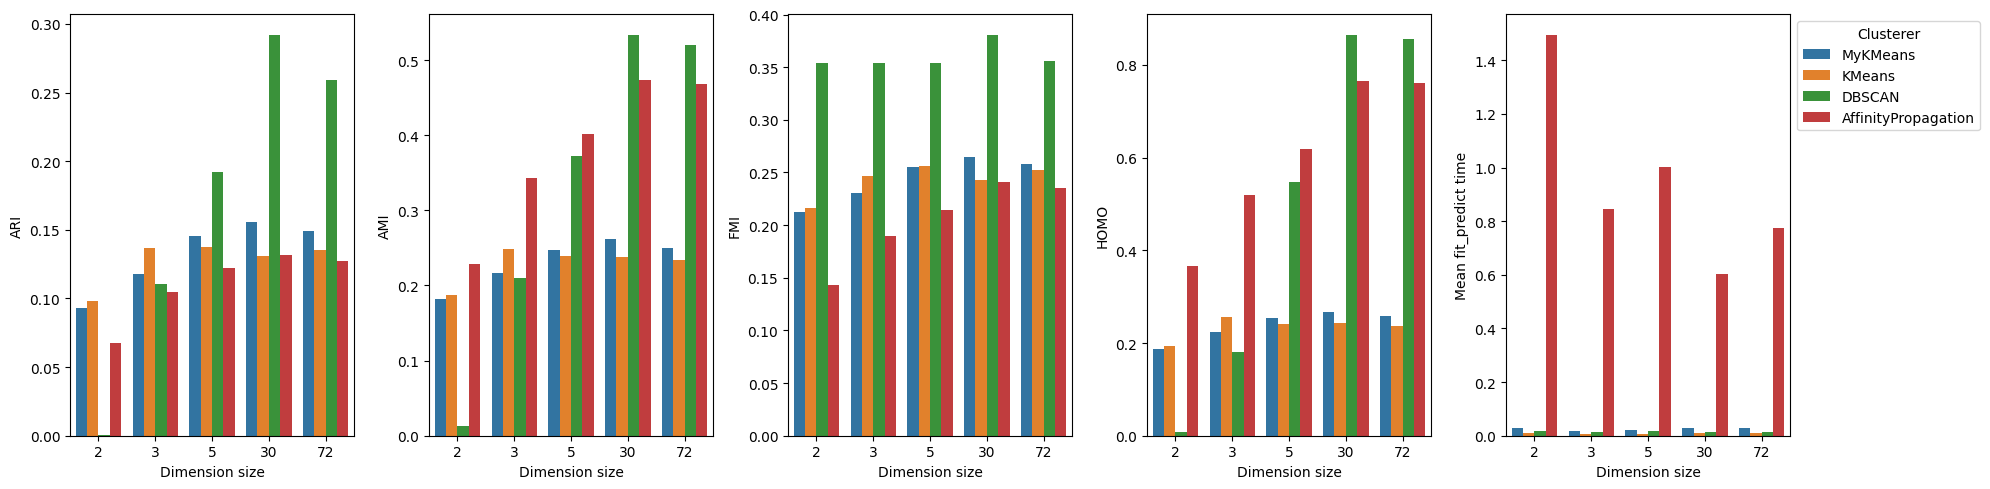

In [76]:
import seaborn as sns

fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for metric, ax in zip(["ARI", "AMI", "FMI", "HOMO", "Mean fit_predict time"], axs.flatten()):
    sns.barplot(train_results, x="Dimension size", y=metric, hue="Clusterer", ax=ax)
    if metric == "Mean fit_predict time":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()

## Выводы

Из полученных данных можно сделать несколько выводов.

- Уменьшение размерности данных при помощи PCA практически не ухудшило результаты.

- По всем качественным метрикам DBSCAN сильно обходит обе реализации KMeans и немного AffinityPropagation. Но при этом результаты кластеризации всё равно плохие.

- По скорости обучения обе реализации KMeans и DBSCAN сильно быстрее, чем AffinityPropagation и сравнимы между собой. При этом KMeans оказалась немного быстрее, чем DBSCAN.

Итог: наиболее эффективной по совокупности метрик, включая скорость, оказалась DBSCAN.

## Приложение

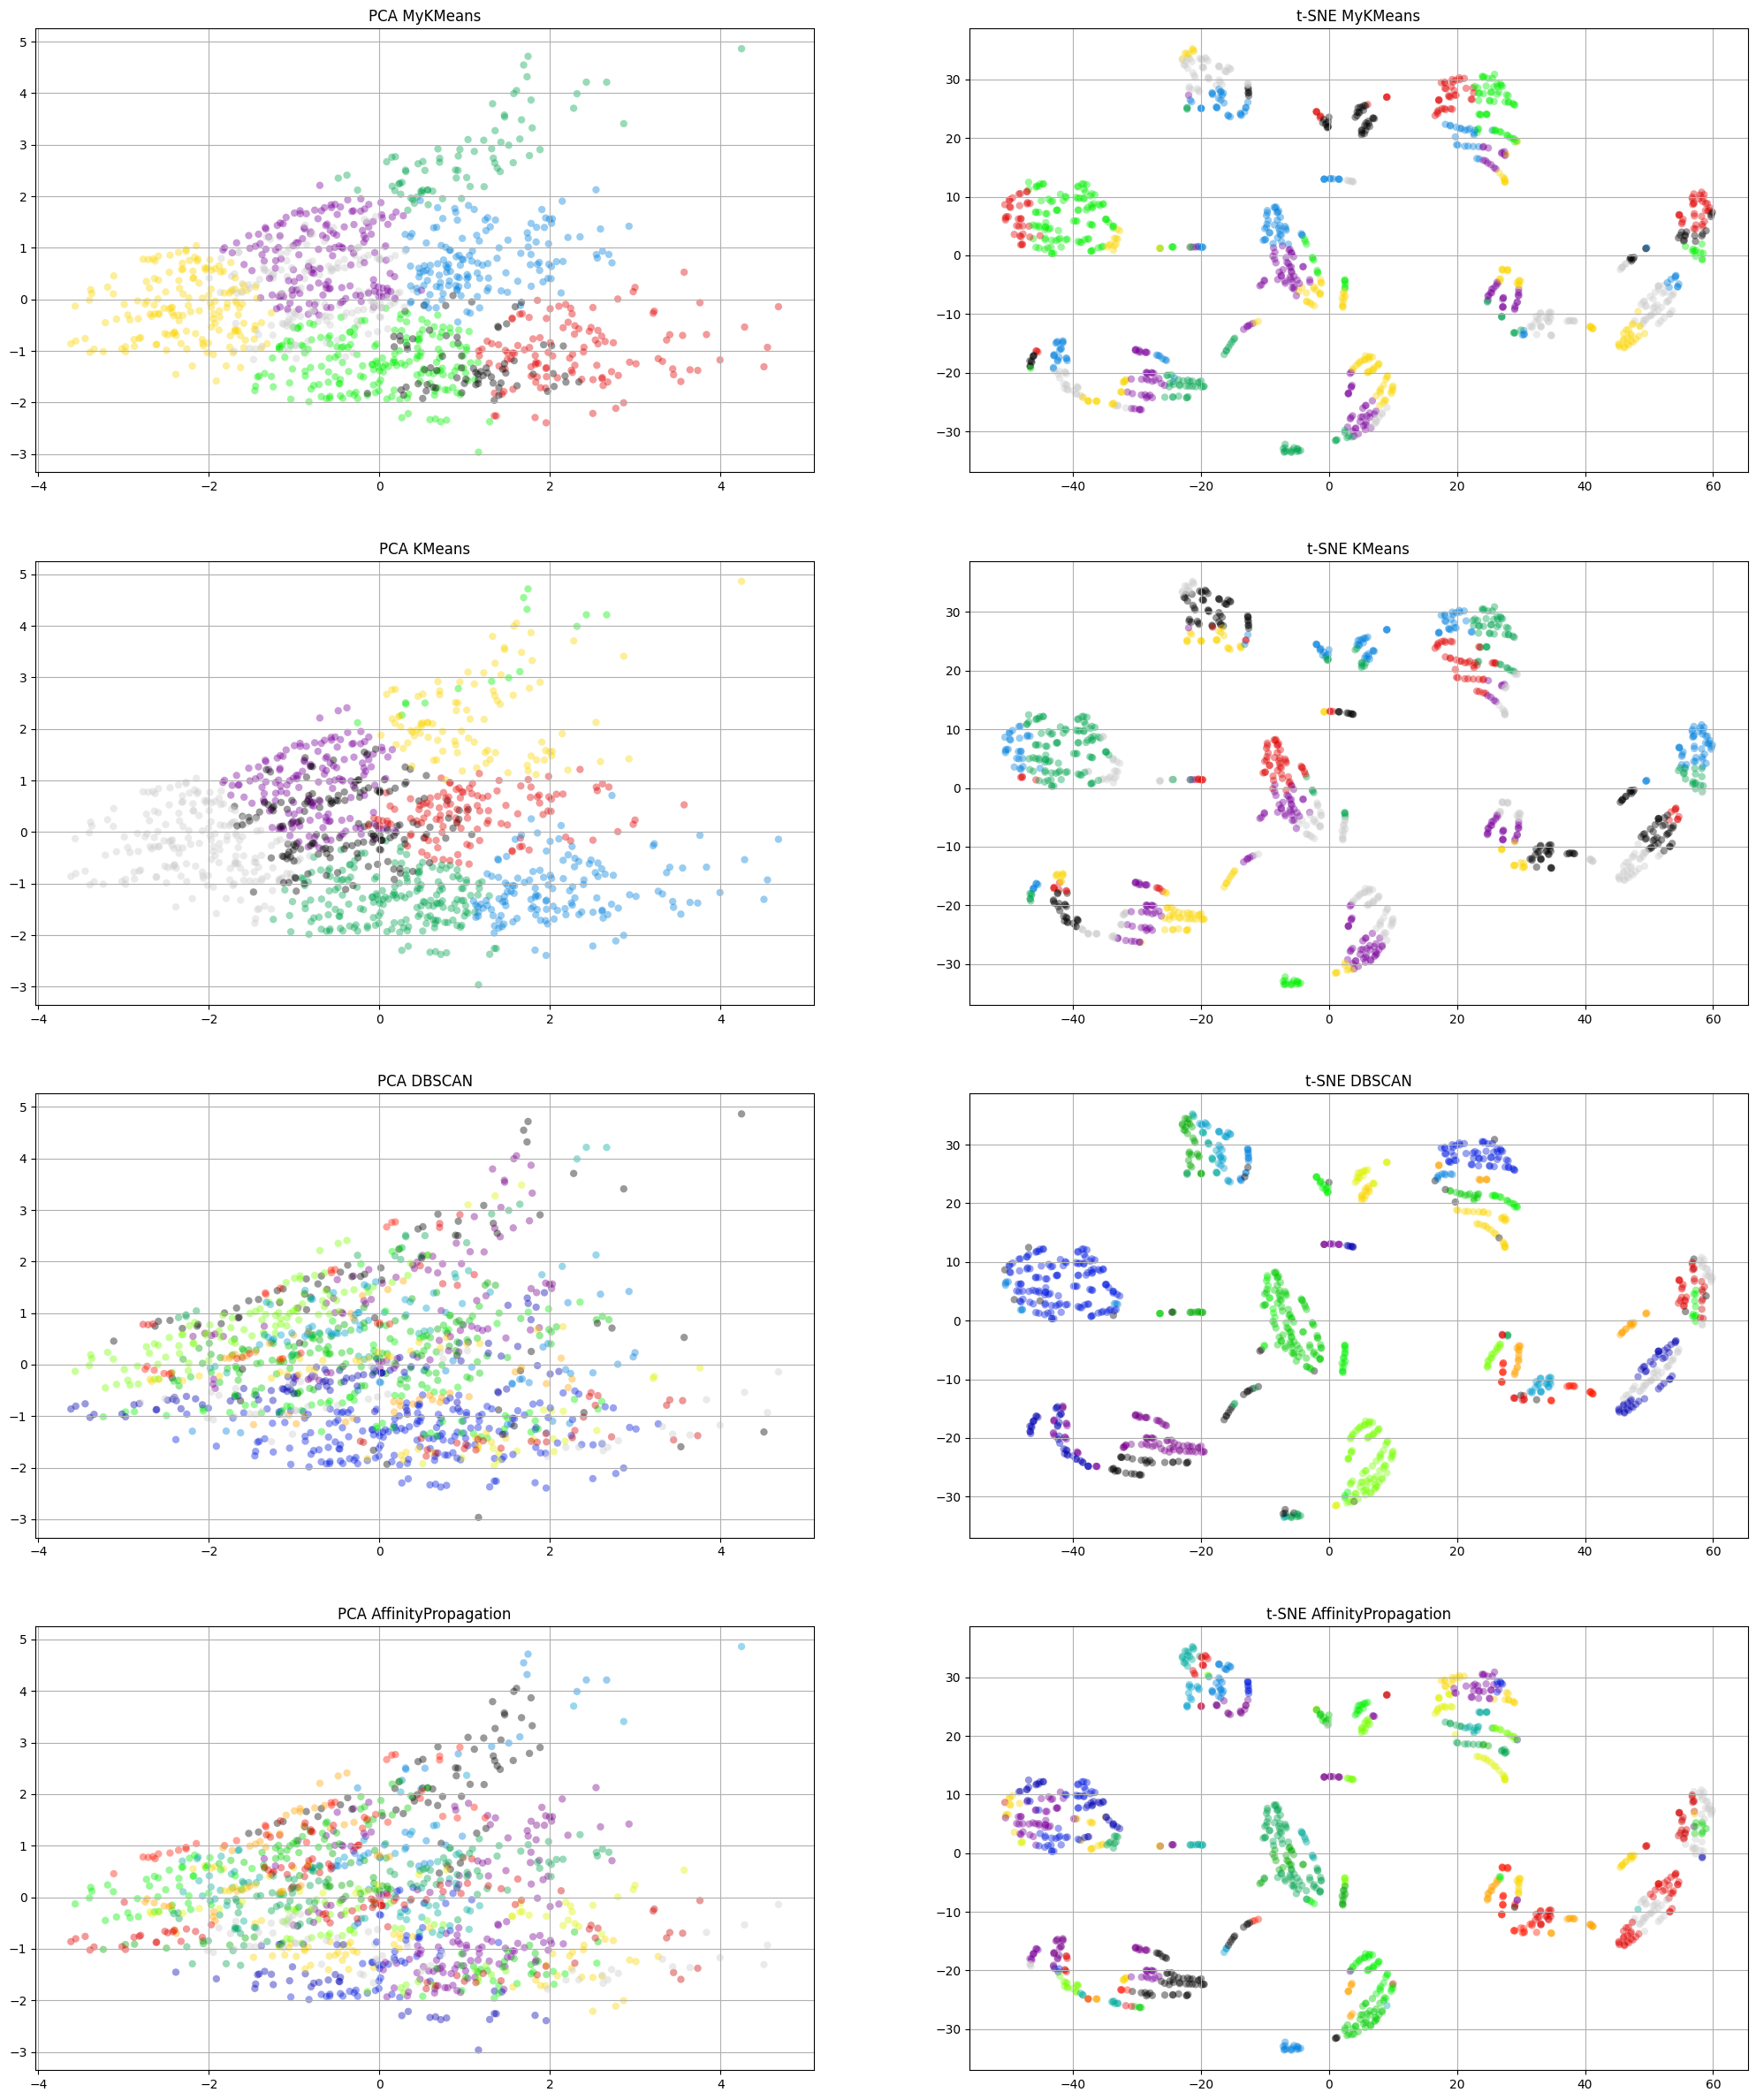

In [73]:
# Визуализация кластеров для каждой модели с наилучшими параметрами

ests = [
    MyKMeans(),
    KMeans(n_clusters=n_clusters, n_init="auto", random_state=0, algorithm='lloyd', tol=5e-05, max_iter=200),
    DBSCAN(n_jobs=-1, eps=0.75, min_samples=2),
    AffinityPropagation(damping=0.625, max_iter=100, convergence_iter=5)
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25,30))

for i, est in enumerate(ests):
    pred = est.fit_predict(x)
    pca_2d_data = pd.DataFrame(pca_x_2d,columns=['PC1','PC2'])
    tsne_2d_data = pd.DataFrame(tsne_x_2d,columns=['t-SNE1','t-SNE2']) 

    pca_2d_data['cluster'] = pd.Categorical(pred)
    tsne_2d_data['cluster'] = pd.Categorical(pred)

    axes[i, 0].scatter(pca_2d_data['PC1'], pca_2d_data['PC2'], c=pca_2d_data['cluster'], cmap=plt.colormaps["nipy_spectral"].resampled(20), edgecolors="none",
                       alpha=0.4)
    axes[i, 0].title.set_text(f"PCA {est.__class__.__name__}")
    axes[i, 0].grid(None)

    axes[i, 1].scatter(tsne_2d_data['t-SNE1'], tsne_2d_data['t-SNE2'], c=tsne_2d_data['cluster'], cmap=plt.colormaps["nipy_spectral"].resampled(20), edgecolors="none",
                       alpha=0.4)
    axes[i, 1].title.set_text(f"t-SNE {est.__class__.__name__}")
    axes[i, 1].grid(None)